### Process Poissona

Zał:
- Skok wykonywany jest co czas ti, wylosowany z rozkładu wykładniczego f(t) = lambda * e**(-lambda*t)

1. Narysować przykładową trajektorię
2. Zebrać 10**4 trajektori i narysować rozkład prawdopodobieństwa dla czasów t = 1, 20, 90 i porównać z rozkładem poissona


Czas powinien byc generowany metodą odwróconej dystrybułanty która dla rozkładu wykładniczego wynosi: PDF= -ln(1-U)/lambda, gdzie U to liczba losowa z rozkładu jednorodnego (0, 1)

In [72]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import poisson

In [73]:
def generate_time():
  return -np.log( 1 - np.random.uniform(0, 1))

In [74]:
def poisson_process(limit):
  time = 0
  points = []

  while True:
    generated_time = generate_time()
    if time + generated_time > limit:
      break
    time += generated_time
    points.append(time)

  return points

In [75]:
simulations = 10_000
times = [1, 20, 90]
results = {time: [] for time in times}

In [80]:
for _ in range(simulations):
  points = poisson_process(90)
  for time in times:
    results[time].append(len([point for point in points if point <= time]))

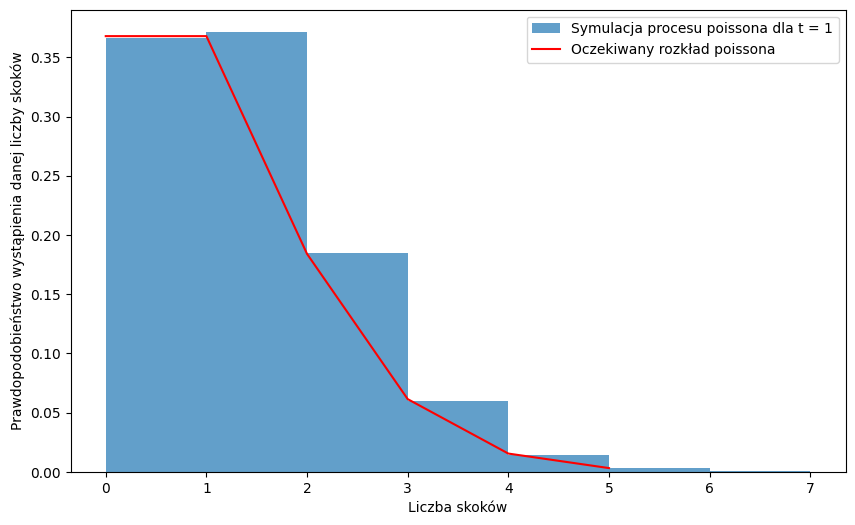

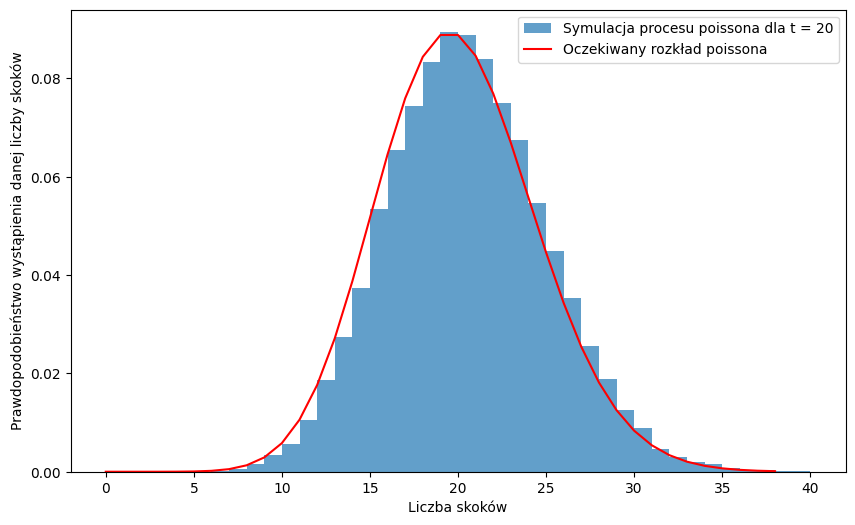

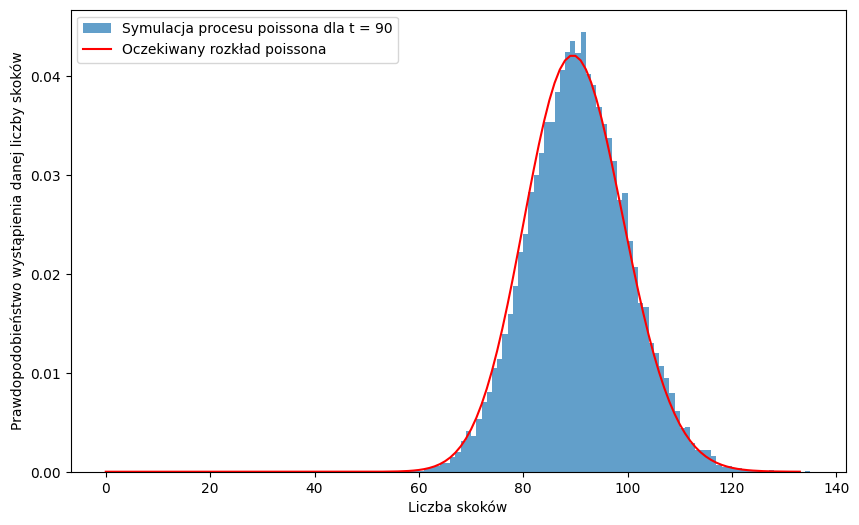

In [89]:
for time in times:
  plt.figure(figsize=(10, 6))
  plt.hist(results[time], bins=range(max(results[time]) + 2), density=True, alpha=0.7, label=f'Symulacja procesu poissona dla t = {time}')

  x = np.arange(0, max(results[time]))
  plt.plot(x, poisson.pmf(x, time), color='red', label='Oczekiwany rozkład poissona')

  plt.ylabel('Prawdopodobieństwo wystąpienia danej liczby skoków')
  plt.xlabel('Liczba skoków')
  plt.legend()
  plt.show()

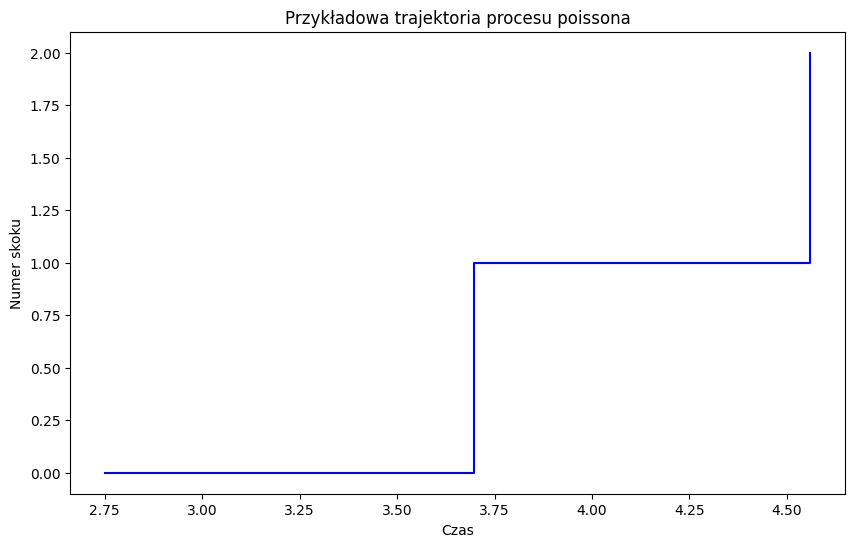

In [78]:
simulation = poisson_process(10)
y = [i for i in range(len(simulation))]

plt.figure(figsize=(10, 6))
plt.step(simulation, y, color='blue', where='post')
plt.title('Przykładowa trajektoria procesu poissona')
plt.xlabel('Czas')
plt.ylabel('Numer skoku')
plt.show()